<a href="https://colab.research.google.com/github/sjosephnyc1987/public_ipython_Notebooks/blob/main/kilme_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermarket Analysis 1
### US.Dollar vs Commodities

The study of how different financial markets are connected to one another is known as intermarket analysis. 

Understanding how the various asset types interact is critical for at least two reasons. First having this knowledge allows you to grasp how other financial markets influence the one you're most interested in. It's critical to understand how bonds and stocks interact, for example. Bond prices normally move in the opposite direction of stock prices, so if you're trading equities, keep an eye on bonds. In many circumstances, bond market turns occur before stock market turns. Bond yields and bond prices are negatively connected. As a result, decreasing bond yields (and rising bond prices) might be a warning sign for equities.

A second reason why understanding intermarket linkages is crucial is that it aids in the asset allocation process. There was a time not long ago when investors only had the option of investing in bonds, stocks, or cash. That constrained mindset was used to create asset allocation models. However, during the last decade, investing options have become much more diverse. The increasing availability of exchange-traded funds (ETFs) has made investing in commodities and currency markets as simple as purchasing a stock on a stock exchange. This opens up a world of possbilty in terms of diversifying risk.

In this example, we're going to see if there is relationshop between the US.Dollar and commodites.

We are going to explore if the follwing is true   

###   $     Commodities \text{   } \alpha \text{   }\frac{1}{US.Dollar}  $


we do this by comparing ther performance of a commodity ETF vs a US.Dollar ETF.

We will first compare the correlation of Commodities to the US.Dollar. We do this under 3 circumstances

Let's get started.

In [ ]:

!pip install yfinance
#we begin by setting up imports in python.
import yfinance as yf  
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

we are going to use the USCI ETF as the proxy for commodities and the UUP ETF as a proxy for the US.Dollar

In [ ]:
asset1 = 'USCI'
asset1_label = 'USCI commodities'

asset2 = 'UUP'
asset2_label = 'UUP US.Dollar'

portfolio1 = [asset1,asset2]

---
# 1x 10 year window  

In the first round of analyis, we will look at the correlation between the two in 10 year interval to see if there is a relationship between them in a small window.

In [ ]:
#window size  = 10 year
start_10year = datetime.datetime(2013,1,1)
end_10year =  datetime.datetime(2021,12,31)

Next we get stock prices from Yahoo over a span of 10 years

In [ ]:
portfolio_df_10year = yf.download(portfolio1,start=start_10year,end=end_10year)['Adj Close']


[*********************100%***********************]  2 of 2 completed


In [ ]:
# let's do a spotcheck to see if the data is any good.
print(portfolio_df_10year.head())

                 USCI        UUP
Date                            
2013-01-02  58.919998  21.144211
2013-01-03  58.529999  21.308945
2013-01-04  58.029999  21.308945
2013-01-07  58.169998  21.241112
2013-01-08  58.410000  21.270184


In [ ]:
#percentage change aka returns
portfolio_df_10year_pctChg = portfolio_df_10year.pct_change()

#spot check
print(portfolio_df_10year_pctChg.head())

                USCI       UUP
Date                          
2013-01-02       NaN       NaN
2013-01-03 -0.006619  0.007791
2013-01-04 -0.008543  0.000000
2013-01-07  0.002413 -0.003183
2013-01-08  0.004126  0.001369


In [ ]:
#next we create the corellation matrix od USCI vs UUP 10year
correlation_matrix_10yr = portfolio_df_10year_pctChg.corr()

And finally we create a heatmap of the correlation matrix to see what the relationship is like.

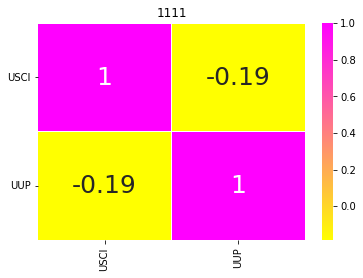

In [ ]:
sns.heatmap(data=correlation_matrix_10yr, annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='1111')
# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

the correlation is -0.19 which is negative, but close to 0 meaning uncorrelated or weak-correlation at best. Let's see if this changes when we do a 5 year window

---
# 2 x 5 year windows  

In the second round of analyis, we will look at the correlation between the two in 5 year ineterval to see if there is a relationship between them in a smaller window. We do this in the event that perhaps there's some smaller correlative effects happening in the short-term, but that these get nulled in the long-term because of say, regime change.

In [ ]:
#window size  = 5 year
start_5year1 = datetime.datetime(2013,1,1)
end_5year1 =  datetime.datetime(2017,12,31)

start_5year2 = datetime.datetime(2018,1,1)
end_5year2 =  datetime.datetime(2022,12,31)


Next we get the prices of the assets from yahoo finance and we create 2 different portfolios of them.

In [ ]:
#get stock prices of portfolio components from yahoo
portfolio_df_5year1 = yf.download(portfolio1,start=start_5year1,end=end_5year1)['Adj Close']
portfolio_df_5year2 = yf.download(portfolio1,start=start_5year2,end=end_5year2)['Adj Close']


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [ ]:
# let's do a spotcheck to see if the data is any good.
print(portfolio_df_5year2.head())



                 USCI        UUP
Date                            
2018-01-02  42.910000  23.210712
2018-01-03  42.910000  23.298008
2018-01-04  42.810001  23.220413
2018-01-05  42.459999  23.239809
2018-01-08  42.410000  23.346504


In [ ]:
#next we caluclate the percentage change aka returns
portfolio_df_5year1_pctChg = portfolio_df_5year1.pct_change()
portfolio_df_5year2_pctChg = portfolio_df_5year2.pct_change()

#and then do a spot check on them
print(portfolio_df_5year1_pctChg.head())

                USCI       UUP
Date                          
2013-01-02       NaN       NaN
2013-01-03 -0.006619  0.007791
2013-01-04 -0.008543  0.000000
2013-01-07  0.002413 -0.003183
2013-01-08  0.004126  0.001369


In [ ]:
#we then calculate the correlation matrix of changes
correlation_matrix_5year1 = portfolio_df_5year1_pctChg.corr()
correlation_matrix_5year2 = portfolio_df_5year2_pctChg.corr()

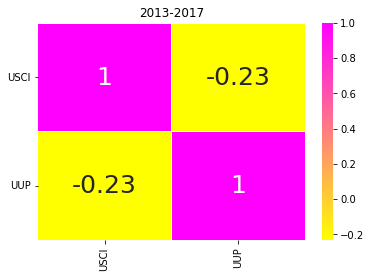

In [ ]:
#We create a heat map for the first 5 year window
sns.heatmap(data=correlation_matrix_5year1,annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='2013-2017')
# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

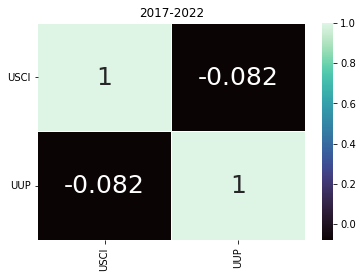

In [ ]:
#We create a heat map for the second 5 year window
sns.heatmap(data=correlation_matrix_5year2,annot=True, cmap="mako", linewidths=0.3, annot_kws={"size": 25}).set(title='2017-2022')
# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

The first 5 year window correlation is -0.23 which is marginally better than the 10 year window correlation of -0.19 but the second 5 year window has a worse corrleation of -0.082. The average of the 2 year windows is - 0.156.

Our Correlation has not improved much by windowing the relationship, but before we jump to any conclusions, let's try some 1 year windows.

---
# 9 x 1 year window 

In the last round of analyis, we will look at the correlation between the two assets in a 1 year interval. We're doing 9 instead of 10, because its more convenient to view the results in a 3 x 3 plot grid.

In [ ]:
#we start by setting up the dates.
start1_annual = datetime.datetime(2021,1,1)
end1_annual =  datetime.datetime(2021,12,31)

start2_annual = datetime.datetime(2022,1,1)
end2_annual =  datetime.datetime(2022,12,31)

start3_annual = datetime.datetime(2019,1,1)
end3_annual =  datetime.datetime(2019,12,31)

start4_annual = datetime.datetime(2018,1,1)
end4_annual =  datetime.datetime(2018,12,31)

start5_annual = datetime.datetime(2017,1,1)
end5_annual =  datetime.datetime(2017,12,31)

start6_annual = datetime.datetime(2016,1,1)
end6_annual =  datetime.datetime(2016,12,31)

start7_annual = datetime.datetime(2015,1,1)
end7_annual =  datetime.datetime(2015,12,31)

start8_annual = datetime.datetime(2014,1,1)
end8_annual =  datetime.datetime(2014,12,31)

start9_annual = datetime.datetime(2013,1,1)
end9_annual =  datetime.datetime(2013,12,31)

Next we get the prices of the assets from yahoo finance and we create 10 different portfolios of them.

In [ ]:
#get stock prices of portfolio components from yahoo
portfolio_df_1_annual = yf.download(portfolio1,start=start1_annual,end=end1_annual)['Adj Close']
portfolio_df_2_annual = yf.download(portfolio1,start=start2_annual,end=end2_annual)['Adj Close']
portfolio_df_3_annual = yf.download(portfolio1,start=start3_annual,end=end3_annual)['Adj Close']
portfolio_df_4_annual = yf.download(portfolio1,start=start4_annual,end=end4_annual)['Adj Close']
portfolio_df_5_annual = yf.download(portfolio1,start=start5_annual,end=end5_annual)['Adj Close']
portfolio_df_6_annual = yf.download(portfolio1,start=start6_annual,end=end6_annual)['Adj Close']
portfolio_df_7_annual = yf.download(portfolio1,start=start7_annual,end=end7_annual)['Adj Close']
portfolio_df_8_annual = yf.download(portfolio1,start=start8_annual,end=end8_annual)['Adj Close']
portfolio_df_9_annual = yf.download(portfolio1,start=start9_annual,end=end9_annual)['Adj Close']


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [ ]:
# let's do a spotcheck to see if the data is any good.
print(portfolio_df_9_annual.head())

                 USCI        UUP
Date                            
2013-01-02  58.919998  21.144209
2013-01-03  58.529999  21.308945
2013-01-04  58.029999  21.308945
2013-01-07  58.169998  21.241112
2013-01-08  58.410000  21.270184


In [ ]:
#next we caluclate thenpercentage change aka returns
portfolio_df_1_annual_pctChg = portfolio_df_1_annual.pct_change()
portfolio_df_2_annual_pctChg = portfolio_df_2_annual.pct_change()
portfolio_df_3_annual_pctChg = portfolio_df_3_annual.pct_change()
portfolio_df_4_annual_pctChg = portfolio_df_4_annual.pct_change()
portfolio_df_5_annual_pctChg = portfolio_df_5_annual.pct_change()
portfolio_df_6_annual_pctChg = portfolio_df_6_annual.pct_change()
portfolio_df_7_annual_pctChg = portfolio_df_7_annual.pct_change()
portfolio_df_8_annual_pctChg = portfolio_df_8_annual.pct_change()
portfolio_df_9_annual_pctChg = portfolio_df_9_annual.pct_change()

In [ ]:
#percentage change spot check
print(portfolio_df_3_annual_pctChg.head())

                USCI       UUP
Date                          
2019-01-02       NaN       NaN
2019-01-03  0.001871 -0.005460
2019-01-04  0.006402 -0.001569
2019-01-07  0.005566 -0.004320
2019-01-08  0.003954  0.003156


Next we create correlation matrices for each of the 9 portfolios

In [ ]:
correlation_matrix1 = portfolio_df_1_annual_pctChg.corr()
correlation_matrix2 = portfolio_df_2_annual_pctChg.corr()
correlation_matrix3 = portfolio_df_3_annual_pctChg.corr()
correlation_matrix4 = portfolio_df_4_annual_pctChg.corr()
correlation_matrix5 = portfolio_df_5_annual_pctChg.corr()
correlation_matrix6 = portfolio_df_6_annual_pctChg.corr()
correlation_matrix7 = portfolio_df_7_annual_pctChg.corr()
correlation_matrix8 = portfolio_df_8_annual_pctChg.corr()
correlation_matrix9 = portfolio_df_9_annual_pctChg.corr()

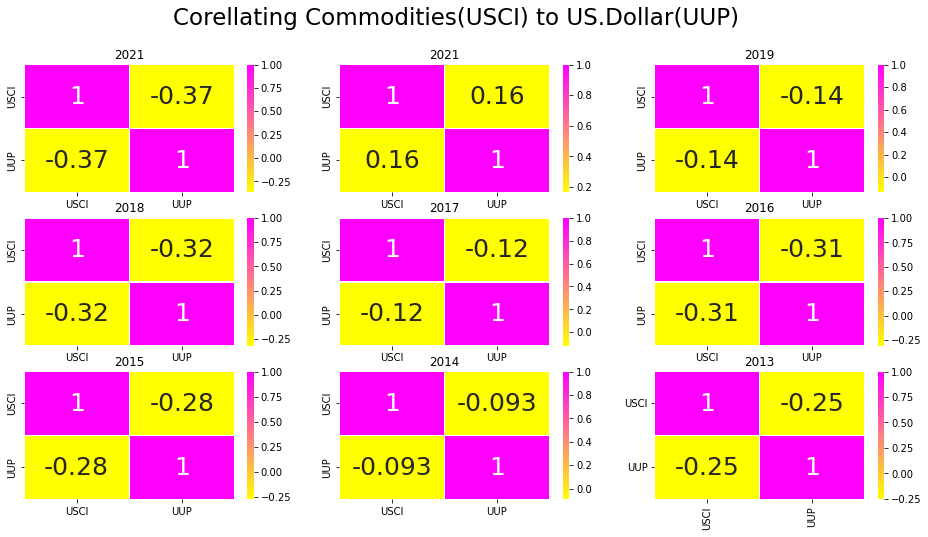

In [ ]:
#we then create a 3 x 3 heatmap of the various correlation matrices
fig, axes = plt.subplots(3, 3, figsize=(16, 8))
fig.suptitle('Corellating Commodities(USCI) to US.Dollar(UUP)',fontsize=23)

sns.heatmap(ax=axes[0,0], data=correlation_matrix1, annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='2021')
sns.heatmap(ax=axes[0,1], data=correlation_matrix2, annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='2021')
sns.heatmap(ax=axes[0,2], data=correlation_matrix3, annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='2019')
sns.heatmap(ax=axes[1,0], data=correlation_matrix4, annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='2018')
sns.heatmap(ax=axes[1,1], data=correlation_matrix5, annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='2017')
sns.heatmap(ax=axes[1,2], data=correlation_matrix6, annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='2016')
sns.heatmap(ax=axes[2,0], data=correlation_matrix7, annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='2015')
sns.heatmap(ax=axes[2,1], data=correlation_matrix8, annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='2014')
sns.heatmap(ax=axes[2,2], data=correlation_matrix9, annot=True, cmap="spring_r", linewidths=0.3, annot_kws={"size": 25}).set(title='2013')

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

Let's see what the average correlation is over a 9 year period, measured every year


In [ ]:
correlation1 = correlation_matrix1.iloc[0,1]
correlation2 = correlation_matrix2.iloc[0,1]
correlation3 = correlation_matrix3.iloc[0,1]
correlation4 = correlation_matrix4.iloc[0,1]
correlation5 = correlation_matrix5.iloc[0,1]
correlation6 = correlation_matrix6.iloc[0,1]
correlation7 = correlation_matrix7.iloc[0,1]
correlation8 = correlation_matrix8.iloc[0,1]
correlation9 = correlation_matrix9.iloc[0,1]

corrlist = []

corrlist.append(correlation1)
corrlist.append(correlation2)
corrlist.append(correlation3)
corrlist.append(correlation4)
corrlist.append(correlation5)
corrlist.append(correlation6)
corrlist.append(correlation7)
corrlist.append(correlation8)
corrlist.append(correlation9)

print(corrlist)

print("\naverage correlation = ", sum(corrlist)/len(corrlist))


[-0.3697831040765119, 0.1644722729548348, -0.13511805595782403, -0.3227241668750886, -0.12142517738426087, -0.310943782413176, -0.2751526345727521, -0.0927118628992229, -0.25451690542966166]

average correlation =  -0.19087815740596256


This also suggests a negative but an almost non-existant co-relation at best. If we look at individual years, the highest number we have is 0.35 which again does not indicate any correlation. It doesnt appear that Commodities and the US.Dollar have a relationship towards one another

To summarize, the values we got from the 3 runs were as follows
1. 10 year window = -0.19
2. 5 year window = -0.15
3. 1 year window = -0.14 

Window size doesnt seem to have that much of an effect on 


---
To further examine, let's see what a chart looks like if we plot the 2 assets against each other (And against a benchmark - SPY)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


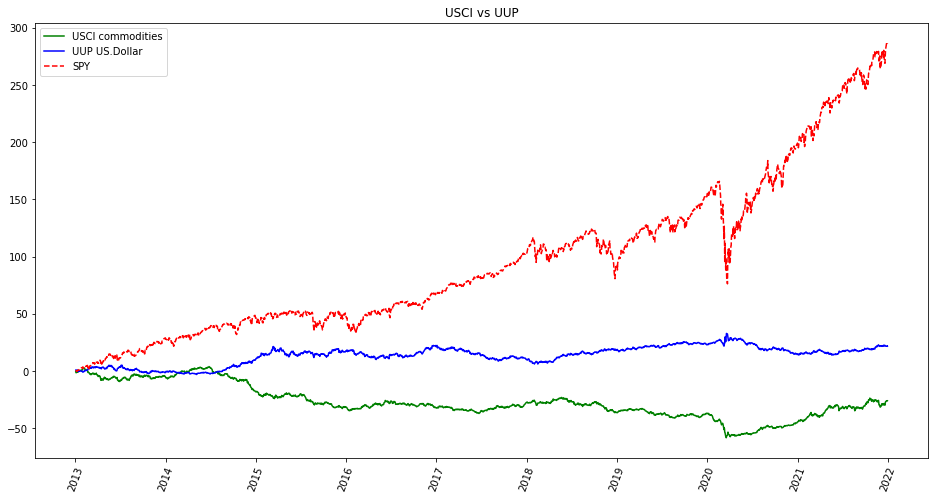

In [ ]:
# #----------portfolio chart -----------
asset1_df = yf.download(asset1,start=start9_annual,end=end1_annual)['Adj Close']
asset2_df = yf.download(asset2,start=start9_annual,end=end1_annual)['Adj Close']
benchmark_df =yf.download('SPY',start=start9_annual,end=end1_annual)['Adj Close']

# -- returns ---
asset1_df_returns = asset1_df.pct_change()
asset2_df_returns = asset2_df.pct_change()
benchmark_df_returns = benchmark_df.pct_change()

# #calculate cumulative returns for Equal Weighted Portfolio

asset1_cume_chg = ((asset1_df_returns+1).cumprod()-1)*100
asset2_cume_chg = ((asset2_df_returns+1).cumprod()-1)*100
benchmark_cume_chg = ((benchmark_df_returns+1).cumprod()-1)*100



fig=plt.figure(figsize=(16,8))

#ploting asset chart
plt.plot(asset1_cume_chg, color='green',label = asset1_label)
plt.plot(asset2_cume_chg, color='blue',label = asset2_label)
plt.plot(benchmark_cume_chg,'--',color='red' ,label = 'SPY')

plt.xticks(rotation=70)

plottitle = asset1 + " vs " + asset2
plt.title(plottitle)
plt.legend(loc='upper left')